# All Light Curves

Notebook to plot all the radio and X-ray light curves. This is shown as Figure 1 in the paper. 

In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get the Data

In [2]:
all_xray_df, all_radio_df, Lr_med, Lx_med = get_all_data()

Found 26 data files.
1A 1744-361: Distance [kpc] = 8.0
4U 1543-47: Distance [kpc] = 5.0
4U 1630-47: Distance [kpc] = 11.5
Cen X-4: Distance [kpc] = 1.87
Cir X-1: Distance [kpc] = 9.4
EXO 1846-031: Distance [kpc] = 4.5
GRS 1739-278: Distance [kpc] = 8
GRS 1915+105: Distance [kpc] = 9.4
GX 339-4: Distance [kpc] = 10.0
H1743-322: Distance [kpc] = 8.5
IGR J17091-3624: Distance [kpc] = 14.0
MAXI J1348-630: Distance [kpc] = 2.2
MAXI J1631-479: Distance [kpc] = 5.0
MAXI J1803-298: Distance [kpc] = 8.0
MAXI J1807+132: Distance [kpc] = 6.3
MAXI J1810-222: Distance [kpc] = 8.0
MAXI J1816-195: Distance [kpc] = 6.0
MAXI J1820+070: Distance [kpc] = 2.96
SAX J1808.4-3658: Distance [kpc] = 2.7
SAX J1810.8-2609: Distance [kpc] = 4.9
Swift J1727.8-1613: Distance [kpc] = 5.5
Swift J1728.9-3613: Distance [kpc] = 8.4
Swift J1842.5-1124: Distance [kpc] = 8.12
Swift J1858.6-0814: Distance [kpc] = 12.8
Vela X-1: Distance [kpc] = 1.99
XTE J1701-462: Distance [kpc] = 8.8
Median Lr (HS/QS detections): 4.54e+28 

In [3]:
## Checking
print(all_radio_df[all_radio_df["name"] == "Cir X-1"] [["Fr", "Lr"]].head())

print()
lr, lr_unc = convert_Fr(Fr_mJy=1.711, Fr_mJy_unc=0, d_kpc=9.4, d_kpc_unc=0, nu_GHz=1.28)
print("Lr =", lr)

        Fr            Lr
129  1.711  2.315887e+29
130  1.550  2.097969e+29
131  2.854  3.862970e+29
132  2.100  2.842410e+29
133  2.600  3.519174e+29

Lr = 2.3158871546250983e+29


In [4]:
## Check that there are no X-ray entries for the sources without X-ray data
all_xray_df[all_xray_df["name"] == "GRS 1915+105"]

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool,Lx,Lx_unc_l,Lx_unc_u,class


# Get General Sample Information

In [5]:
## Number of sources
unique_names = all_radio_df["name"].unique()
n_names = len(unique_names)
print("Number of sources: ", n_names)


## Number of BH and BH candidates
mask =  all_radio_df["class"].isin(["BH", "candidateBH"])
unique_names =  all_radio_df[mask]["name"].unique()
n_names = len(unique_names)
print("Number of BH and BH candidates: ", n_names)


## Number of NS
mask =  all_radio_df["class"].isin(["NS", "candidateNS"])
unique_names =  all_radio_df[mask]["name"].unique()
n_names = len(unique_names)
print("Number of NS and NS candidates: ", n_names)

Number of sources:  26
Number of BH and BH candidates:  16
Number of NS and NS candidates:  9


In [6]:
## X-ray information

## Number of X-ray data points
n_data = len(all_xray_df)
print(f"Number of X-ray data points: {n_data}")


## Number of HS and QS X-ray data points
n_data =  len(all_xray_df[all_xray_df["Xstate"].isin(["HS", "QS"])])
print(f"Number of HS & QS X-ray data points: {n_data}")

Number of X-ray data points: 1033
Number of HS & QS X-ray data points: 671


In [7]:
## Sources that have radio data but no X-ray data
names_radio = all_radio_df["name"].unique()
names_xray = all_xray_df["name"].unique()
names_no_xray = [name for name in names_radio if name not in names_xray]
print("Sources with radio data but no X-ray data: ", names_no_xray)

Sources with radio data but no X-ray data:  ['Cir X-1', 'GRS 1915+105', 'Swift J1728.9-3613', 'Swift J1858.6-0814']


In [8]:
## Radio information

## Number of radio data points
n_data = len(all_radio_df)
print(f"Number of radio data points: {n_data}")

## Number of radio data points for the sources considered on the LrLx plane
n_data =  all_radio_df[~all_radio_df["name"].isin(names_no_xray)].shape[0]
print(f"Number of radio data points for the sources considered on the LrLx plane: {n_data}")

## Number of HS and QS radio data points for the sources considered on the LrLx plane
mask = (~all_radio_df["name"].isin(names_no_xray) & all_radio_df["Rstate"].isin(["HS", "QS"]))
n_data = all_radio_df[mask].shape[0]
print(f"Number of HS & QS radio data points for the sources considered on the LrLx plane: {n_data}")

Number of radio data points: 926
Number of radio data points for the sources considered on the LrLx plane: 777
Number of HS & QS radio data points for the sources considered on the LrLx plane: 477


In [9]:
## Dates

dates_radio =  all_radio_df["t_radio"].to_numpy()
dates_xray = all_xray_df["t_xray"].to_numpy()

print(f"Radio range of MJDs: {np.min(dates_radio)} - {np.max(dates_radio)}")
print(f"X-ray range of MJDs: {np.min(dates_xray)} - {np.max(dates_xray)}")

Radio range of MJDs: 58223.01521 - 60463.89865
X-ray range of MJDs: 58189.08144 - 60463.82307


In [10]:
## X-ray flux limits

Fx_uplim_bool = all_xray_df['Fx_uplim_bool'].to_numpy()
Fx_det =  all_xray_df["Fx"].to_numpy()[~Fx_uplim_bool]
Fx_uplim =  all_xray_df["Fx"].to_numpy()[Fx_uplim_bool]
Lx_det =  all_xray_df["Lx"].to_numpy()[~Fx_uplim_bool]
Lx_uplim =  all_xray_df["Lx"].to_numpy()[Fx_uplim_bool]

## Upper limit ranges
print(f"Fx uplim range: {Fx_uplim.min()} - {Fx_uplim.max()}")
print(f"Lx uplim range: {Lx_uplim.min()} - {Lx_uplim.max()}")

print()

## Detections
print(f"Fx det range: {Fx_det.min()} - {Fx_det.max()}")
print(f"Lx det range: {Lx_det.min()} - {Lx_det.max()}")

Fx uplim range: 2e-13 - 5.9e-11
Lx uplim range: 1.1584493888671988e+32 - 8.20967232193077e+35

Fx det range: 8.46e-14 - 3.278e-07
Lx det range: 1.1372468162706668e+32 - 1.0661354531918441e+39


In [11]:
## Radio flux limits

Fr_uplim_bool = all_radio_df['Fr_uplim_bool'].to_numpy()
Fr_det =  all_radio_df["Fr"].to_numpy()[~Fr_uplim_bool]
Fr_uplim =  all_radio_df["Fr"].to_numpy()[Fr_uplim_bool]
Lr_det =  all_radio_df["Lr"].to_numpy()[~Fr_uplim_bool]
Lr_uplim =  all_radio_df["Lr"].to_numpy()[Fr_uplim_bool]    

## Upper limit ranges
print(f"Fr uplim range: {Fr_uplim.min()} - {Fr_uplim.max()}")
print(f"Lr uplim range: {Lr_uplim.min()} - {Lr_uplim.max()}")

print()

## Detections
print(f"Fr det range: {Fr_det.min()} - {Fr_det.max()}")
print(f"Lr det range: {Lr_det.min()} - {Lr_det.max()}")

Fr uplim range: 0.0129 - 0.6
Lr uplim range: 6.9101042666172875e+25 - 1.2155102017403272e+29

Fr det range: 0.05 - 1360.0
Lr det range: 5.8235668203092554e+26 - 1.840798673460043e+32


In [12]:
## Information on Bahramian data

lr_all, lx_all, all_types = get_bahramian_data()
print()

print(f"Lr range: {np.min(lr_all)} - {np.max(lr_all)}")
print(f"Lx range: {np.min(lx_all)} - {np.max(lx_all)}")

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.

Lr range: 2.1248e+25 - 4.5823999999999996e+30
Lx range: 2.5e+30 - 1.32e+38


# Radio Light Curves

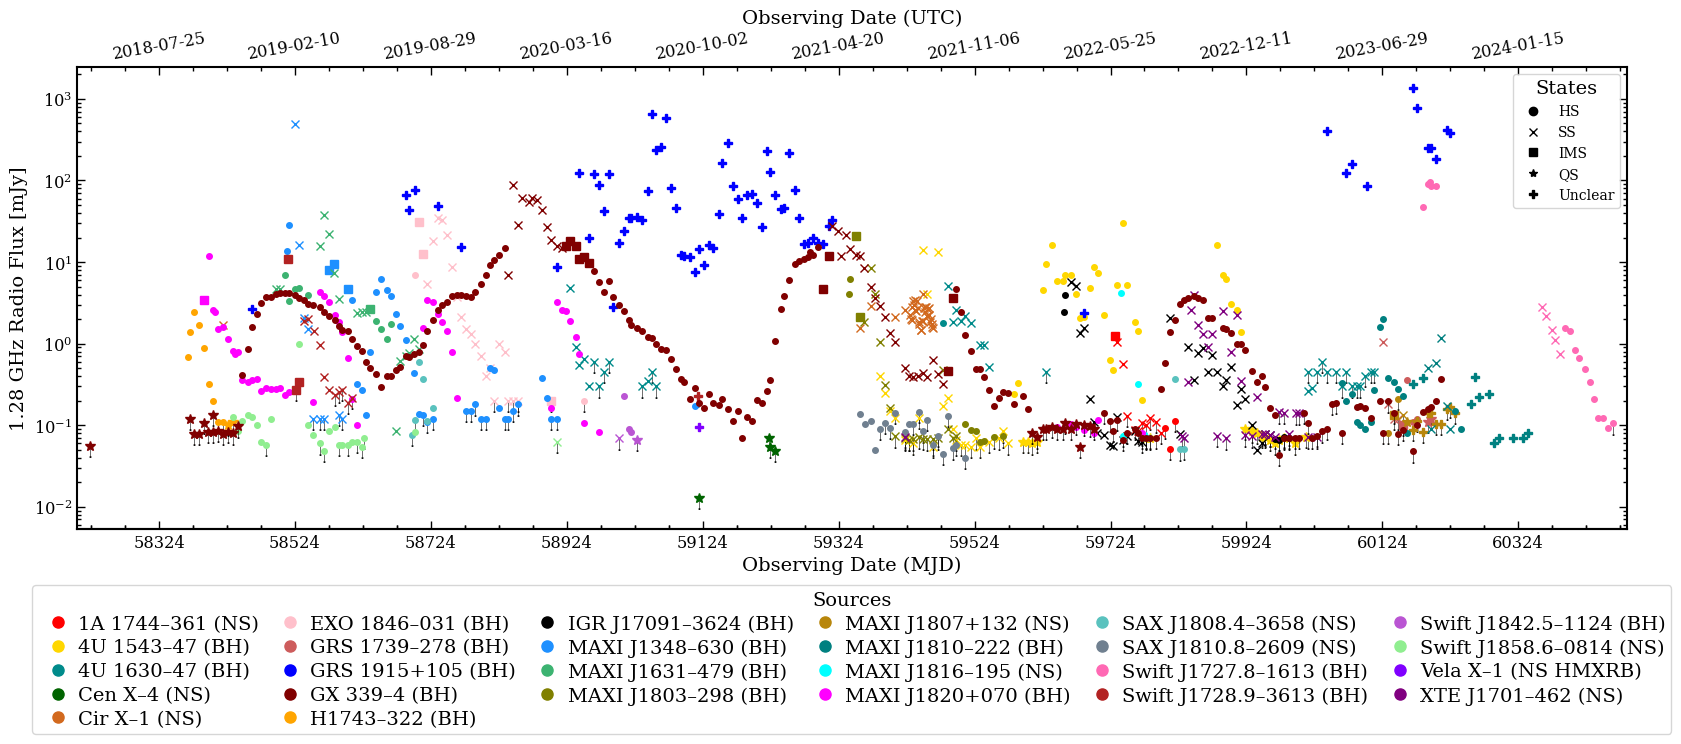

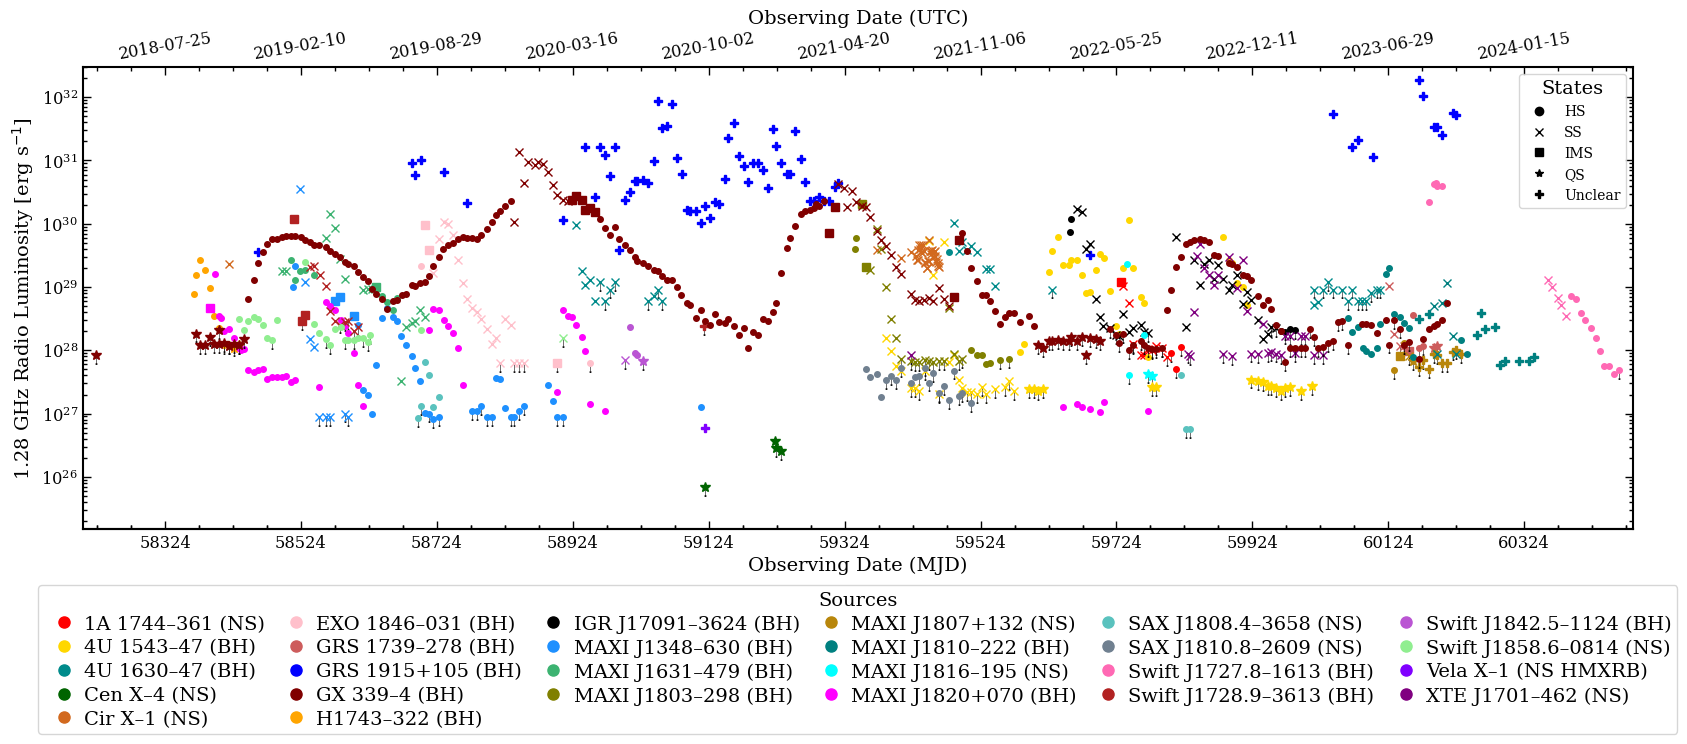

In [13]:
plot_all_lightcurves(all_radio_df, show_errorbars=False, save_name="all_radio_lightcurves")

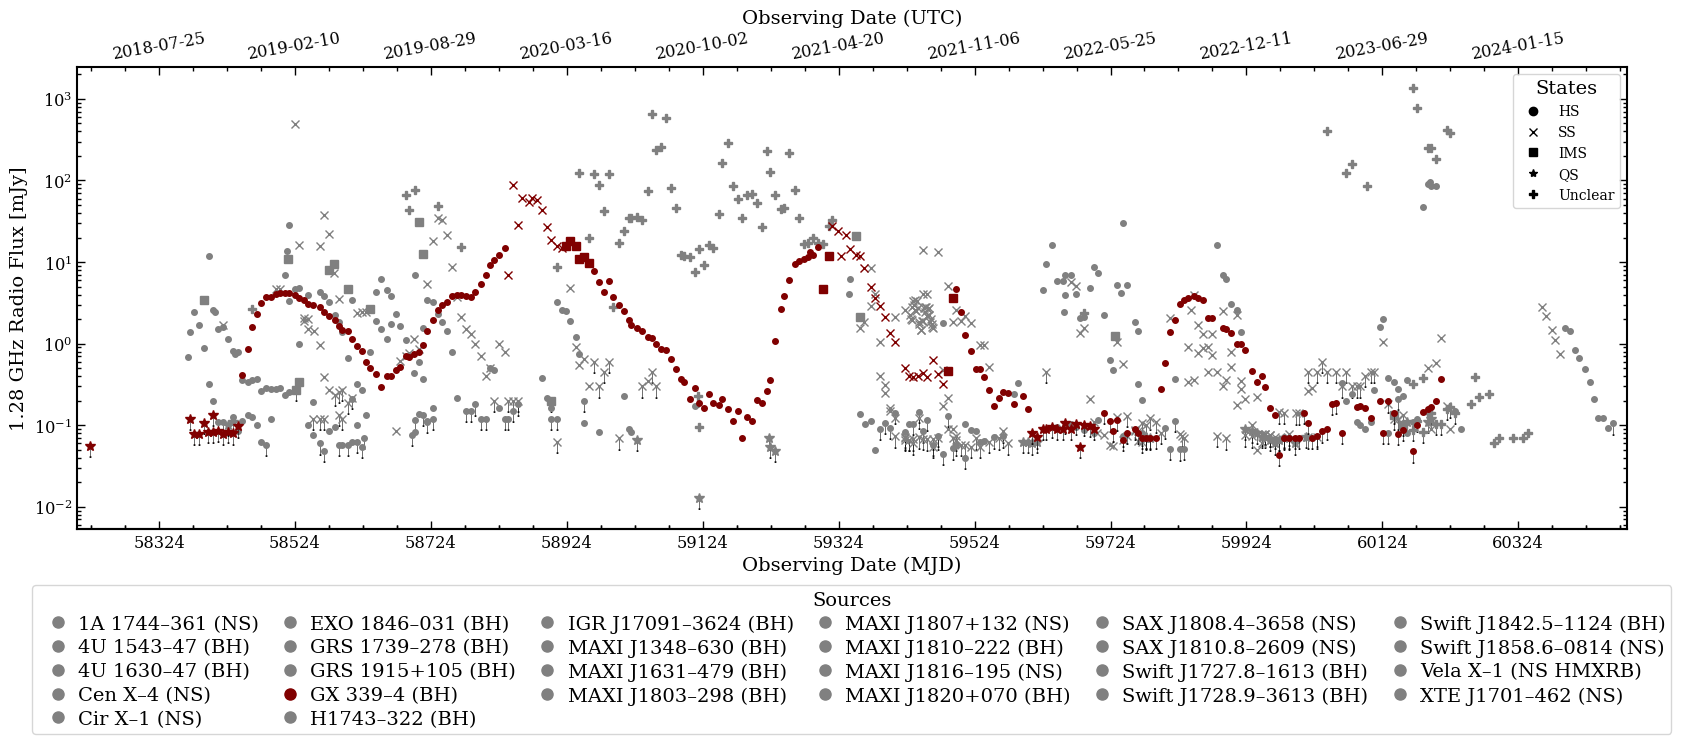

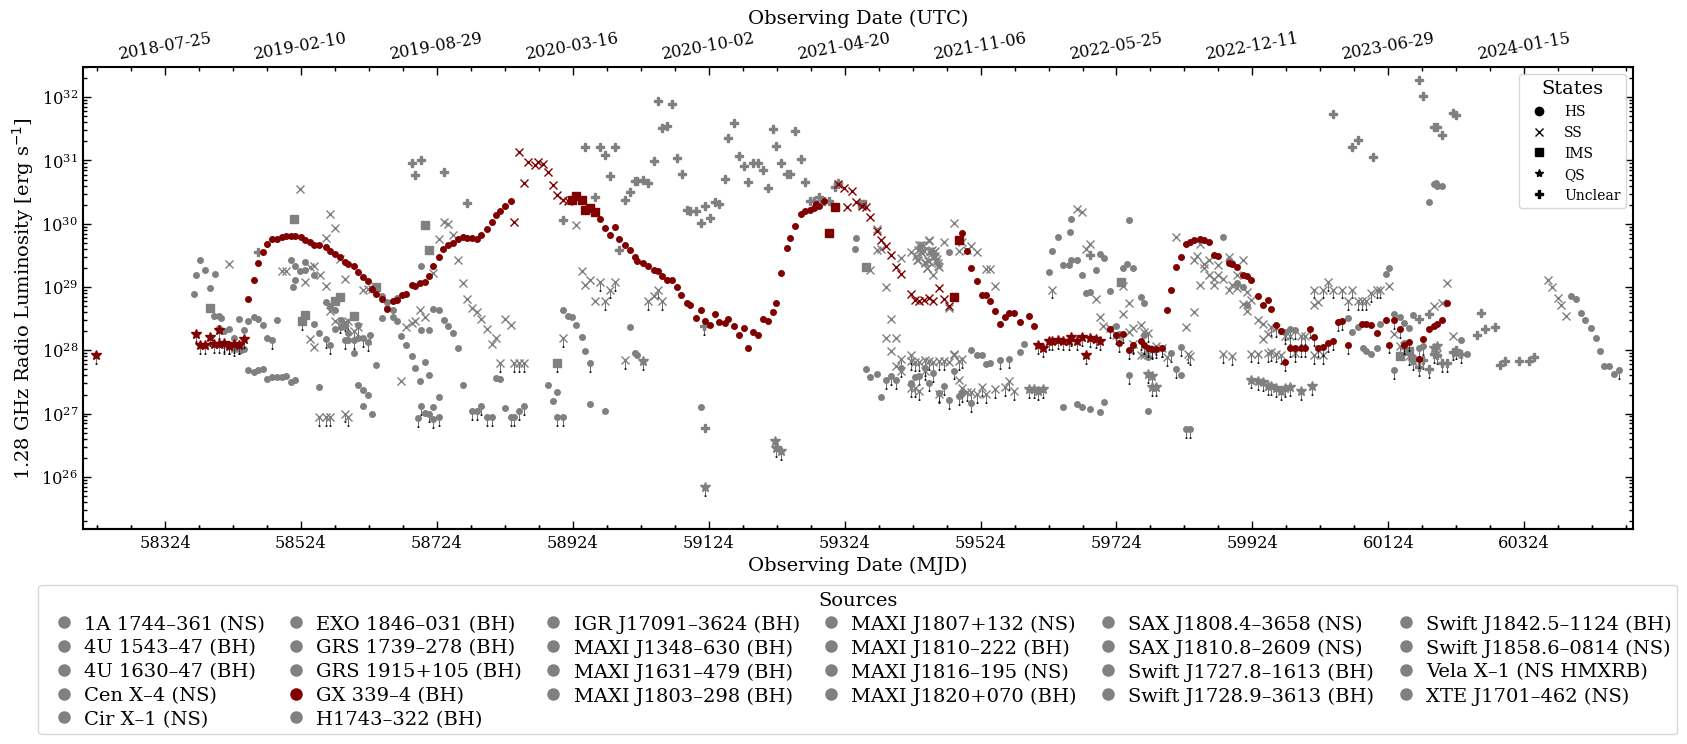

In [14]:
## Highlight GX 339-4
plot_all_lightcurves(all_radio_df, show_errorbars=False, highlight_name="GX 339-4", save_name="all_radio_lightcurves_highlight_gx339")

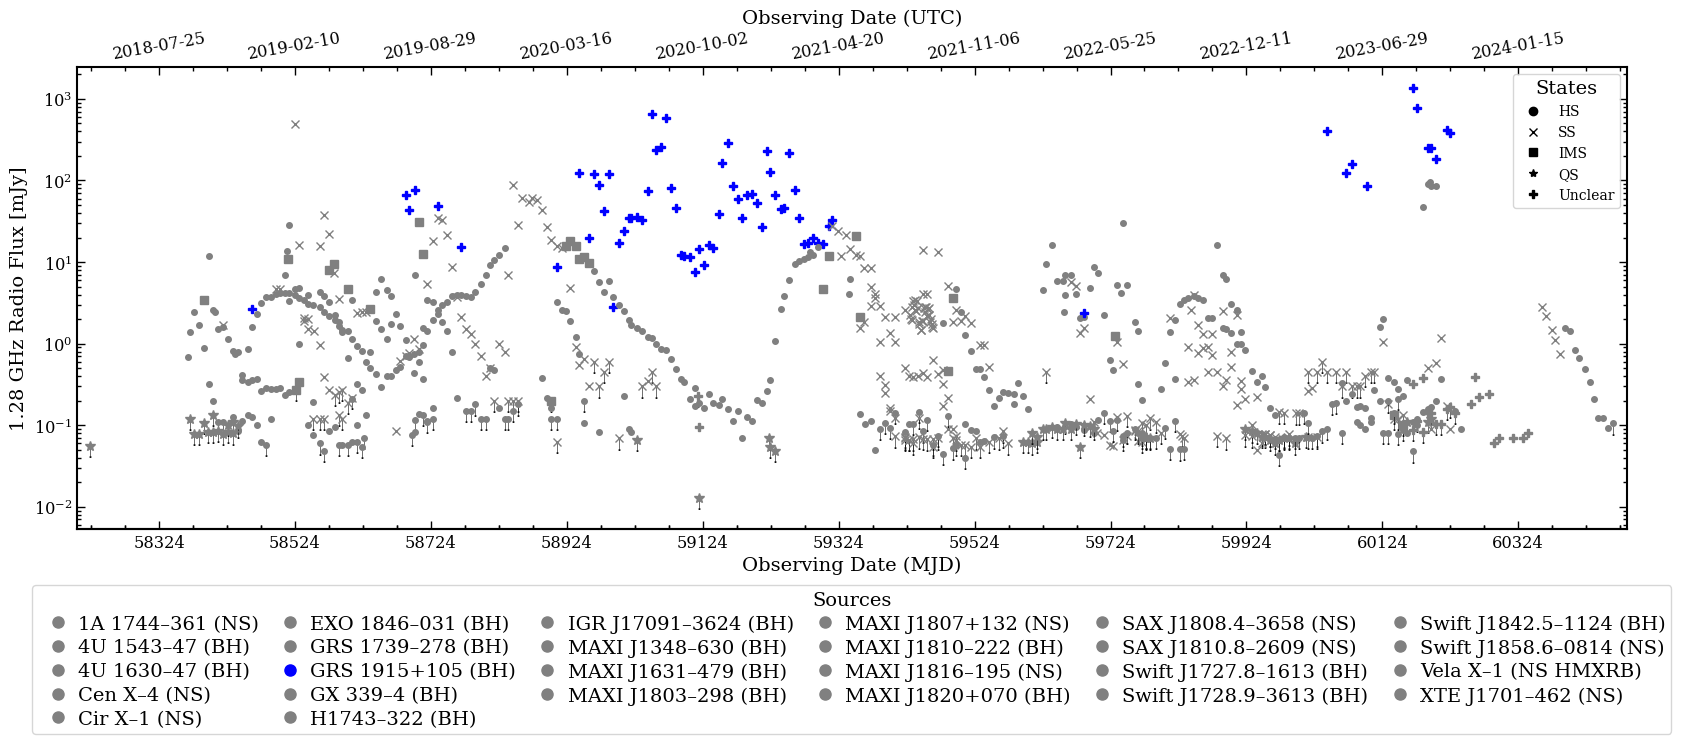

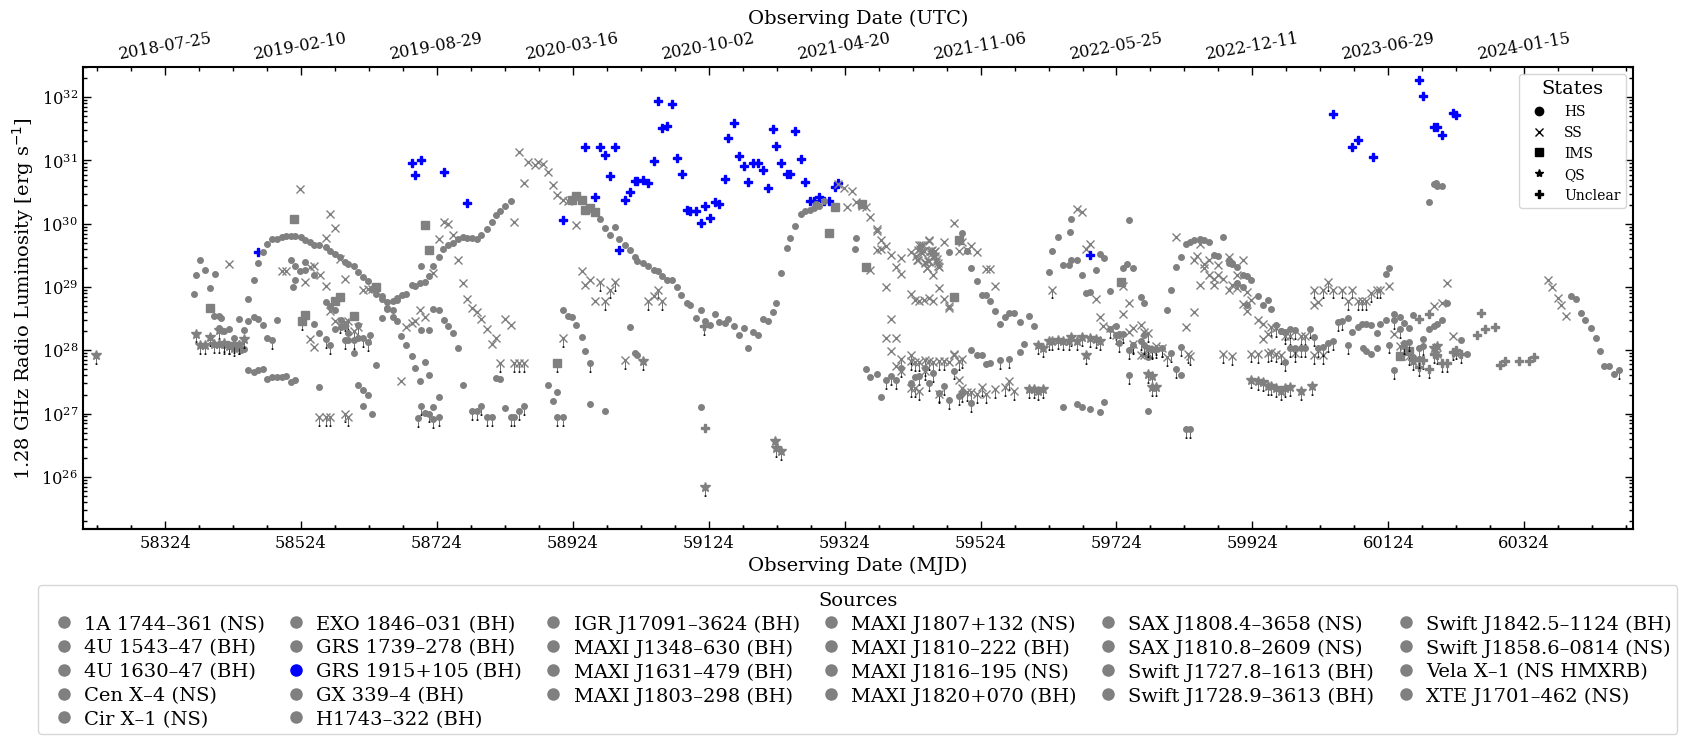

In [15]:
## Highlight GRS 1915+105
plot_all_lightcurves(all_radio_df, show_errorbars=False, highlight_name="GRS 1915+105", save_name="all_radio_lightcurves_highlight_grs1915")

# X-ray Light Curves

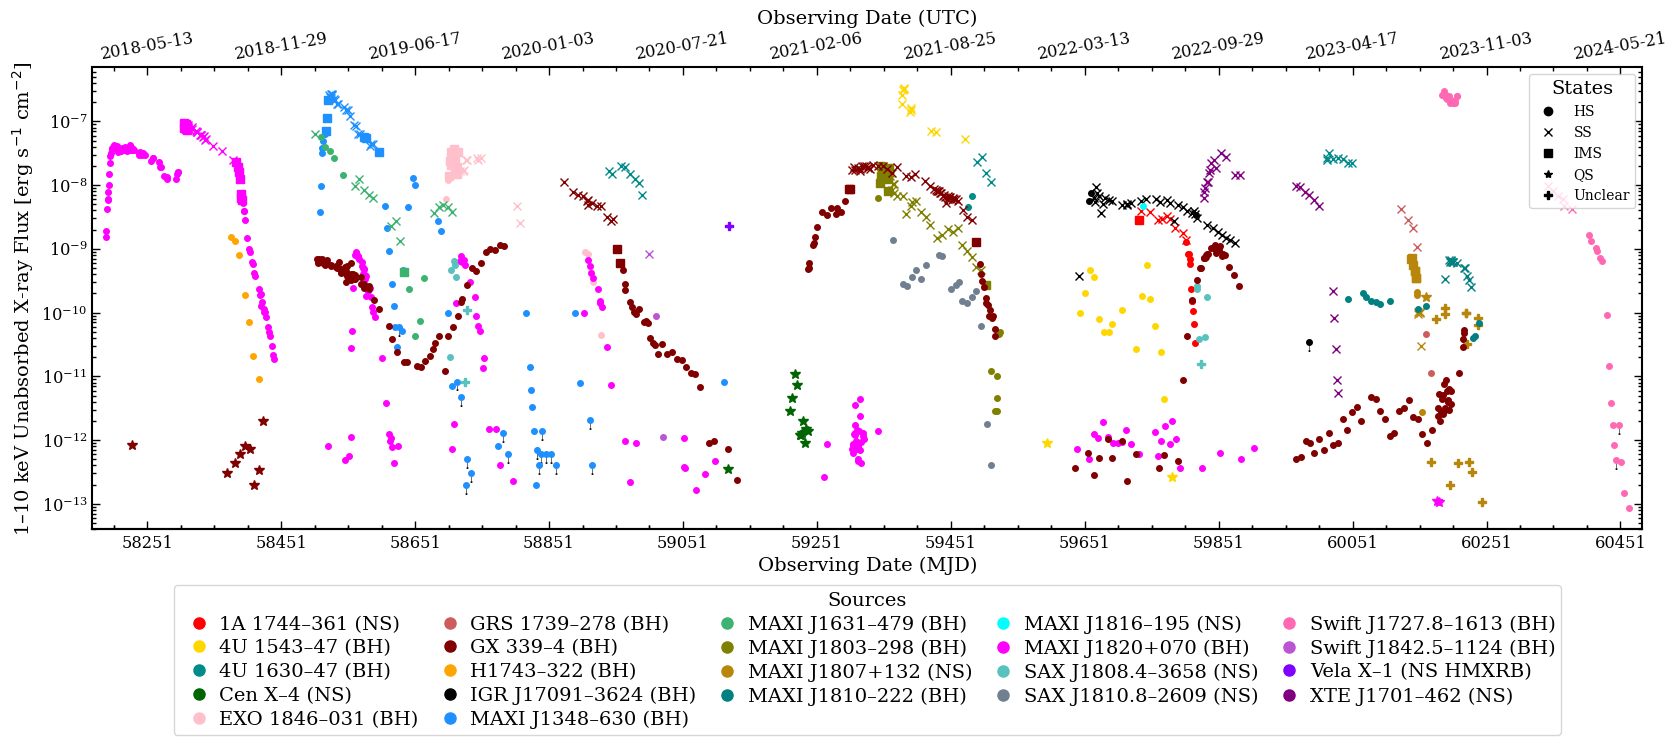

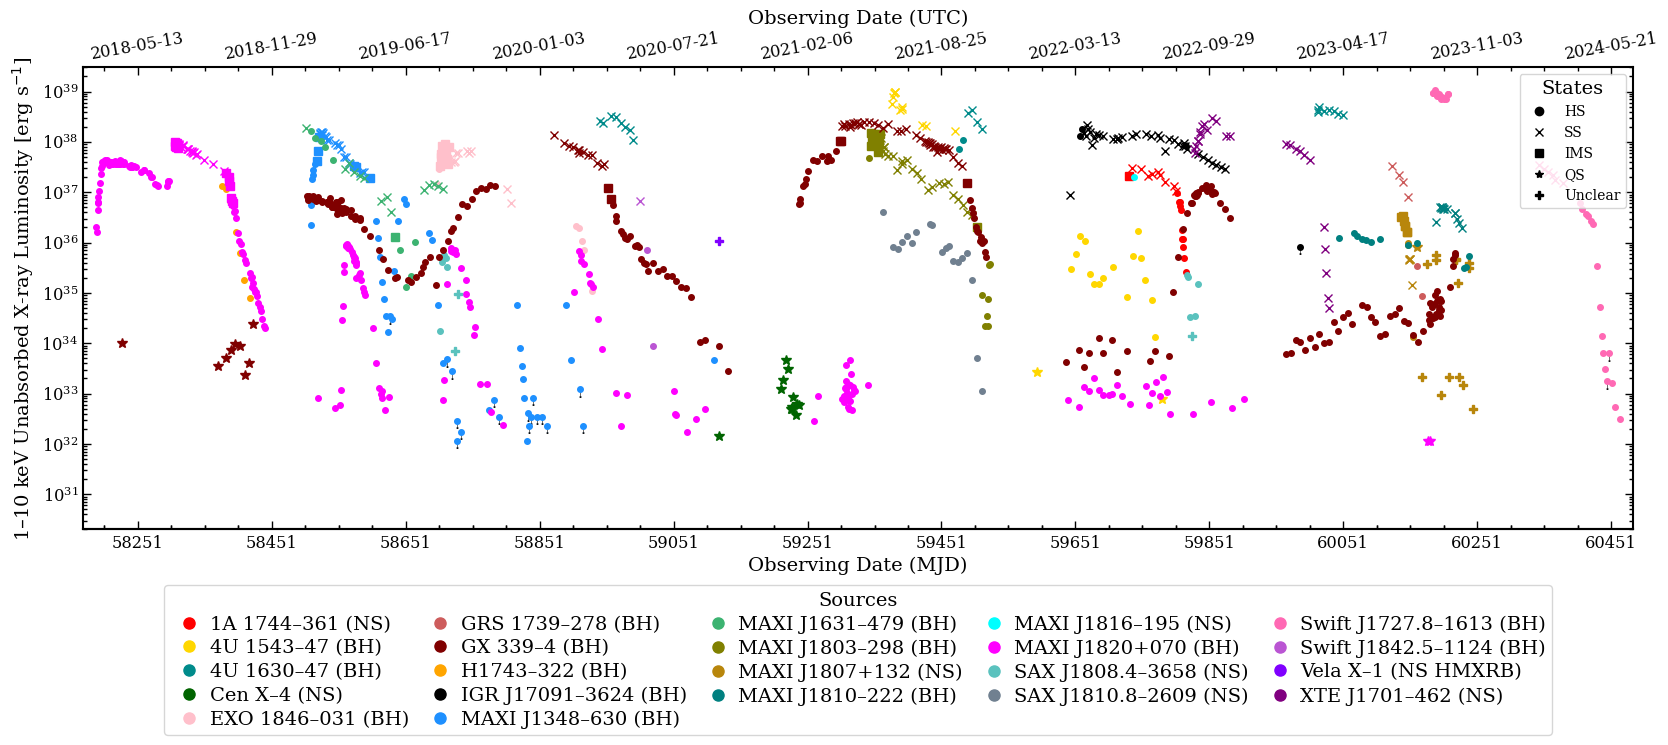

In [16]:
plot_all_lightcurves(all_xray_df, show_errorbars=False, save_name="all_xray_lightcurves")